# Analyse du csv ghg-world contenant le détail des émissions de gaz à effet de serre depuis 1850

Rédigé par : Nicolas Quéquet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
owid_ghg = pd.read_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/Cleaned CSV/owid_ghg_world.csv')
owid_ghg.head()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,1850,1287033856,1.546684e+12,0.0,0.0,196.848,11.800,6.376,2835.459,0.000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,4219.061,681.081
1,1851,1294571381,1.561941e+12,0.0,0.0,198.779,1.931,0.981,3018.492,183.033,...,0.0,0.0,0.0,0.0,0.000,0.001,0.002,0.0,4409.311,684.198
2,1852,1301972716,1.577382e+12,0.0,0.0,207.595,8.817,4.435,3065.094,46.601,...,0.0,0.0,0.0,0.0,0.001,0.003,0.004,0.0,4465.078,696.189
3,1853,1309237862,1.593009e+12,0.0,0.0,217.237,9.642,4.645,3122.835,57.741,...,0.0,0.0,0.0,0.0,0.001,0.004,0.006,0.0,4532.813,709.859
4,1854,1316366818,1.608820e+12,0.0,0.0,255.039,37.802,17.401,3169.879,47.044,...,0.0,0.0,0.0,0.0,0.002,0.006,0.008,0.0,4594.583,756.674


In [ ]:
owid_ghg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            174 non-null    int64  
 1   population                      174 non-null    int64  
 2   gdp                             174 non-null    float64
 3   cement_co2                      174 non-null    float64
 4   cement_co2_per_capita           174 non-null    float64
 5   co2                             174 non-null    float64
 6   co2_growth_abs                  174 non-null    float64
 7   co2_growth_prct                 174 non-null    float64
 8   co2_including_luc               174 non-null    float64
 9   co2_including_luc_growth_abs    174 non-null    float64
 10  co2_including_luc_growth_prct   174 non-null    float64
 11  co2_including_luc_per_capita    174 non-null    float64
 12  co2_including_luc_per_gdp       174 

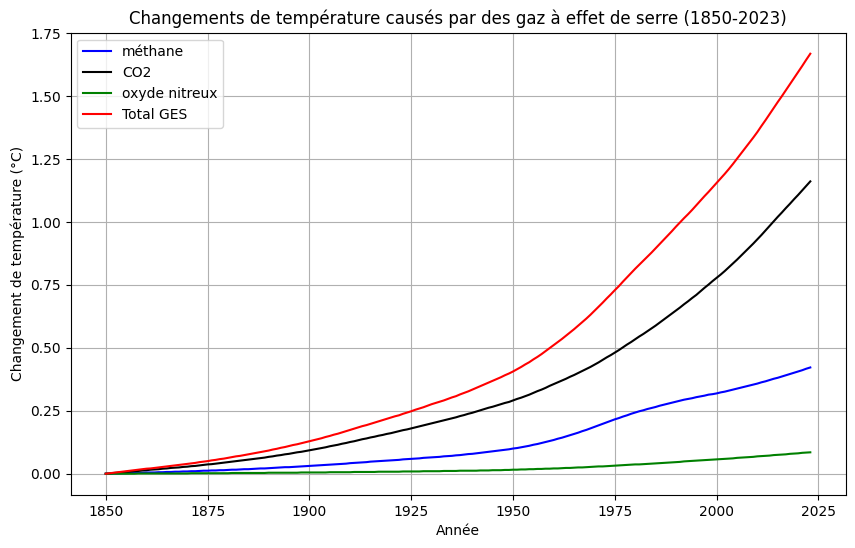

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Changements de température causés par des gaz à effet de serre (1850-2023)")
sns.lineplot(x='year', y='temperature_change_from_ch4', data=owid_ghg, color='blue', label='méthane')
sns.lineplot(x='year', y='temperature_change_from_co2', data=owid_ghg,color='black', label='CO2')
sns.lineplot(x='year', y='temperature_change_from_n2o', data=owid_ghg,color='green', label='oxyde nitreux')
sns.lineplot(x='year', y='temperature_change_from_ghg', data=owid_ghg,color='red', label='Total GES')
plt.xlabel('Année')
plt.ylabel('Changement de température (°C)')
plt.grid(True)
plt.legend()
plt.show();

In [ ]:
owid_ghg.loc[:, ['year', 'co2','cumulative_co2', 'co2_including_luc', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_luc_co2', 'cumulative_oil_co2']]

,year,co2,cumulative_co2,co2_including_luc,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_luc_co2,cumulative_oil_co2
0,1850,196.848,4769.853,2835.459,2835.459,4769.853,2638.611,0.000
1,1851,198.779,4968.631,3018.492,5853.951,4968.631,5458.325,0.000
2,1852,207.595,5176.226,3065.094,8919.044,5176.226,8315.823,0.000
3,1853,217.237,5393.463,3122.835,12041.880,5393.463,11221.421,0.000
4,1854,255.039,5648.502,3169.879,15211.758,5648.502,14136.262,0.000
...,...,...,...,...,...,...,...,...
169,2019,37104.273,1665152.625,40891.020,2465905.250,775500.688,805325.500,581714.125
170,2020,35126.527,1700279.250,38565.520,2504470.500,789767.562,808764.500,592674.812
171,2021,36991.734,1737270.875,40544.516,2545015.000,804902.125,812317.250,604205.750
172,2022,37293.836,1774564.625,40834.871,2585850.000,820088.125,815858.312,616115.375


La cellule ci-dessus m'a montré qu'il y avait un problème sur le cumul. En créant la première version du CSV, je n'avais pas réinitialisé les cumuls en 1850 donc il y avait également les valeurs précédentes depuis 1750. Ce qui faisait que les données ne pouvaient pas être comparées entre elles.
J'ai corrigé cela par la suite en commençant la première ligne du cumul à 0.

In [ ]:
cumul_cols = []
for c in owid_ghg.columns:
  if ('cumul' in c) and ('including' not in c) and ('cumulative_co2' not in c):
    cumul_cols.append(c)

cumul_df = owid_ghg[cumul_cols].tail(1)
cumul_df = cumul_df.iloc[0].sort_values(ascending=False)
display(np.round(cumul_df.values,0))
display(cumul_df)

print("somme = ", cumul_df.values.sum())

array([830916., 819483., 628324., 270077.,  48366.,  19796.,  10304.])

,173
cumulative_coal_co2,830916.370
cumulative_luc_co2,819483.250
cumulative_oil_co2,628324.250
cumulative_gas_co2,270076.594
cumulative_cement_co2,48366.293
cumulative_flaring_co2,19795.938
cumulative_other_co2,10303.908


somme =  2627266.603


In [ ]:
somme = cumul_df.values.sum()
prct = np.round(cumul_df.values/somme*100,1)
labels = [f"{int(val)} ({pourcent}%)" for val, pourcent in zip(cumul_df.values, prct)]
display(labels)

['830916 (31.6%)',
 '819483 (31.2%)',
 '628324 (23.9%)',
 '270076 (10.3%)',
 '48366 (1.8%)',
 '19795 (0.8%)',
 '10303 (0.4%)']

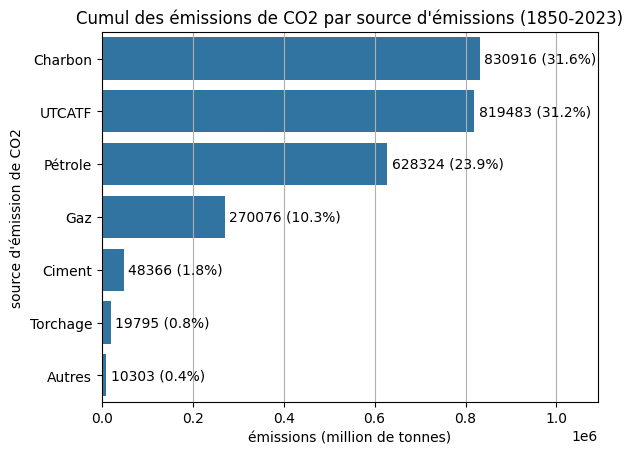

In [ ]:

plt.title("Cumul des émissions de CO2 par source d'émissions (1850-2023)")
plt.grid(True)
ax = sns.barplot(y=cumul_df.index, x=np.round(cumul_df.values,0));
#plt.xticks(rotation=90)
plt.ylabel("source d'émission de CO2")
plt.xlabel("émissions (million de tonnes)")
#affichage des valeurs à côté des barres
ax.bar_label(ax.containers[0], labels=labels, label_type="edge", padding=3)
#pour avoir un peu plus d'espace sur la droite pour afficher la valeur
plt.xlim(0, cumul_df.values.max() + 260000)
plt.yticks(cumul_df.index, ['Charbon', "UTCATF", "Pétrole", "Gaz", "Ciment", "Torchage", "Autres"])
plt.show();

Essayons de calculer les autres gaz à effet de serre (autres que ceux observés : co2, methane, oxyde nitreux) en faisant la différence entre les données total_ghg et les émissions des 3 autres

In [ ]:
cumul_df = pd.DataFrame(data={'gaz':['CO2_luc', 'CO2', "methane", "nitrous_oxide", "total_ghg_luc", "total_ghg"],
                        'cumul': [owid_ghg['co2_including_luc'].sum(), owid_ghg['co2'].sum(), owid_ghg['methane'].sum(), owid_ghg['nitrous_oxide'].sum(),
                                  owid_ghg['total_ghg'].sum(), owid_ghg['total_ghg_excluding_lucf'].sum()]})

cumul_df.loc[6] = ['other_ghg_including_luc', owid_ghg['total_ghg'].sum() - owid_ghg['co2_including_luc'].sum() - owid_ghg['methane'].sum() - owid_ghg['nitrous_oxide'].sum()]
cumul_df.loc[7] = ['other_ghg', owid_ghg['total_ghg_excluding_lucf'].sum() - owid_ghg['co2'].sum() - owid_ghg['methane'].sum() - owid_ghg['nitrous_oxide'].sum()]

#cumul_df['cumulative_co2_including_luc'] = owid_ghg['co2_including_luc'].sum()
#cumul_df['cumulative_nitrous_oxide'] = owid_ghg['nitrous_oxide'].sum()
#cumul_df['cumulative_methane'] = owid_ghg['methane'].sum()
#cumul_df['cumulative_ghg'] = owid_ghg['total_ghg'].sum()
#cumul_df['other_ghg'] = cumul_df['cumulative_ghg'] - cumul_df['cumulative_co2_including_luc'] - cumul_df['cumulative_nitrous_oxide'] - cumul_df['cumulative_methane']

#cumul_df = cumul_df.sort_values(by=0, ascending=False)

#rounded = np.round(cumul_df.values/1000,3)
#values = rounded[:,0]
#display(values)

display(cumul_df)

,gaz,cumul
0,CO2_luc,2627266.546
1,CO2,1807783.284
2,methane,751477.115
3,nitrous_oxide,189648.129
4,total_ghg_luc,3522160.094
5,total_ghg,2210784.774
6,other_ghg_including_luc,-46231.696
7,other_ghg,-538123.754


In [ ]:
#Ici j'essaie de savoir si je peux retrouver les valeurs des autres ghg non observés en faisant la différence entre total et le détail co2, methane, nitrous oxide
df = owid_ghg.loc[:, ['year', 'co2', 'co2_including_luc', 'methane', 'nitrous_oxide', 'total_ghg', 'total_ghg_excluding_lucf']]

df['other_ghg_including_luc'] = df['total_ghg'] - df['co2_including_luc'] - df['methane'] - df['nitrous_oxide']
df['other_ghg'] = df['total_ghg_excluding_lucf'] - df['co2'] - df['methane']- df['nitrous_oxide']

df

,year,co2,co2_including_luc,methane,nitrous_oxide,total_ghg,total_ghg_excluding_lucf,other_ghg_including_luc,other_ghg
0,1850,196.848,2835.459,1239.410,144.832,4219.061,681.081,-0.640,-900.009
1,1851,198.779,3018.492,1244.053,147.445,4409.311,684.198,-0.679,-906.079
2,1852,207.595,3065.094,1250.690,150.001,4465.078,696.189,-0.707,-912.097
3,1853,217.237,3122.835,1258.188,152.464,4532.813,709.859,-0.674,-918.030
4,1854,255.039,3169.879,1270.683,154.799,4594.583,756.674,-0.778,-923.847
...,...,...,...,...,...,...,...,...,...
169,2019,37104.273,40891.020,10279.053,2869.841,52796.523,43147.367,-1243.391,-7105.800
170,2020,35126.527,38565.520,10163.954,2909.539,50792.543,41394.840,-846.470,-6805.180
171,2021,36991.734,40544.516,10330.923,2949.630,52938.793,43391.352,-886.276,-6880.935
172,2022,37293.836,40834.871,10529.812,2975.719,53327.215,43746.762,-1013.187,-7052.605


Les 2 cellules précédentes nous montrent une incohérence des données : normalement total_ghg devrait être supérieur à la somme de co2, methane et oxyde nitreux, or il est inférieur. Cela s'explique par le fait que les données proviennent de sources différentes, chacune avec leurs méthodologies. On ne peut donc pas les comparer entre elles ni savoir quelle est la proportion des autres GES non observés.

# Comparaison CO2, methane, oxyde nitreux

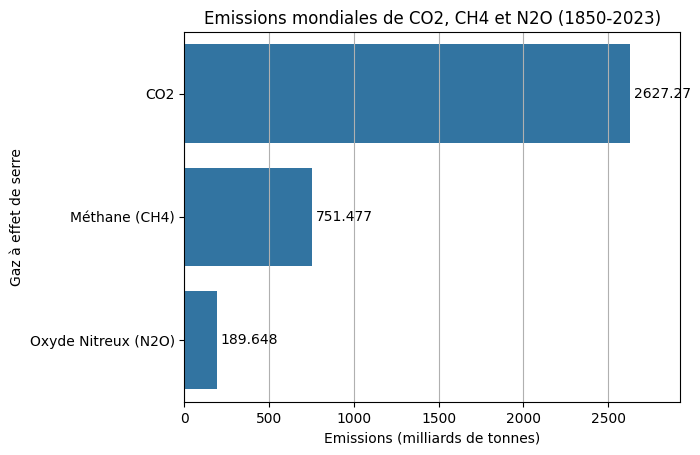

In [ ]:
cumul_df = pd.DataFrame()
cumul_df['cumulative_co2_including_luc'] = [owid_ghg['cumulative_co2_including_luc'].tail(1).reset_index(drop=True)[0]]
cumul_df['cumulative_methane'] = [owid_ghg['methane'].sum()]
cumul_df['cumulative_nitrous_oxide'] = [owid_ghg['nitrous_oxide'].sum()]
cumul_df = cumul_df.T
cumul_df = cumul_df.sort_values(by=0, ascending=False)

rounded = np.round(cumul_df.values/1000,3)
values = rounded[:,0]

plt.title("Emissions mondiales de CO2, CH4 et N2O (1850-2023)")
plt.grid(True)
ax = sns.barplot(y=cumul_df.index, x=values);
#plt.xticks(rotation=90)
plt.ylabel("Gaz à effet de serre")
plt.xlabel("Emissions (milliards de tonnes)")
#affichage des valeurs à côté des barres
ax.bar_label(ax.containers[0], label_type="edge", padding=3)
#pour avoir un peu plus d'espace sur la droite pour afficher la valeur
plt.xlim(0, values.max() + 300)
plt.yticks(cumul_df.index, ['CO2', "Méthane (CH4)", "Oxyde Nitreux (N2O)"])
plt.show();

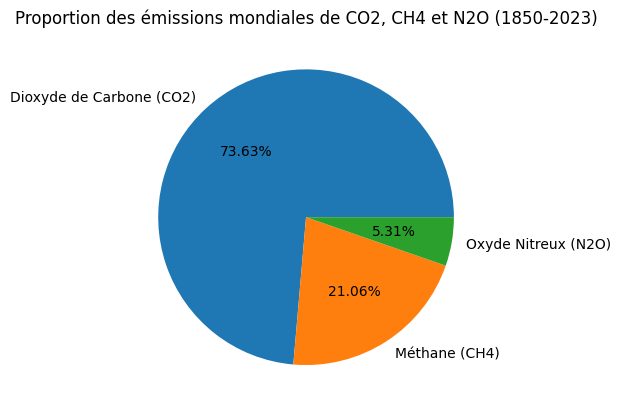

In [ ]:
plt.title("Proportion des émissions mondiales de CO2, CH4 et N2O (1850-2023)")
plt.grid(True)
ax = plt.pie(labels=['Dioxyde de Carbone (CO2)', 'Méthane (CH4)', 'Oxyde Nitreux (N2O)'], x=values, autopct = lambda x: str(round(x,2)) + '%')

plt.show();

# Analyse des changements de température

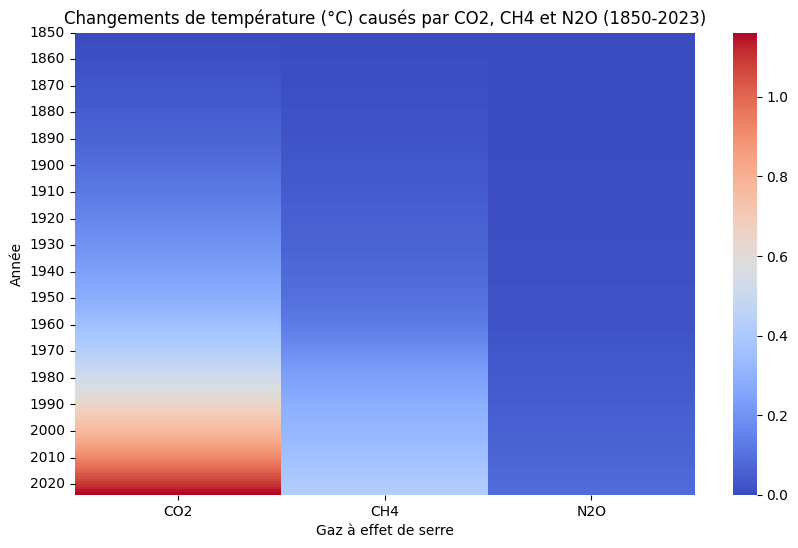

In [ ]:
temp_changes = owid_ghg.loc[:,['temperature_change_from_co2', 'temperature_change_from_ch4', 'temperature_change_from_n2o']]
plt.figure(figsize=(10, 6))

sns.color_palette("coolwarm", as_cmap=True)

#calcul des labels year tous les 10 ans
yticks = ((owid_ghg['year'] / 10).astype(int) * 10).unique()

#calcul des positions tous les 10 index
yPosition = ((owid_ghg.index / 10).astype(int) * 10).unique()

ax = sns.heatmap(temp_changes, cmap="coolwarm", yticklabels=yticks, xticklabels=['CO2', 'CH4', 'N2O'])

#set les ticks aux bonnes positions
ax.set_yticks(yPosition)

#modification des labels des ticks pour mettre les années tous les 10 ans
ax.set_yticklabels(yticks)
plt.ylabel("Année")
plt.xlabel("Gaz à effet de serre")

plt.title("Changements de température (°C) causés par CO2, CH4 et N2O (1850-2023)")
plt.show();

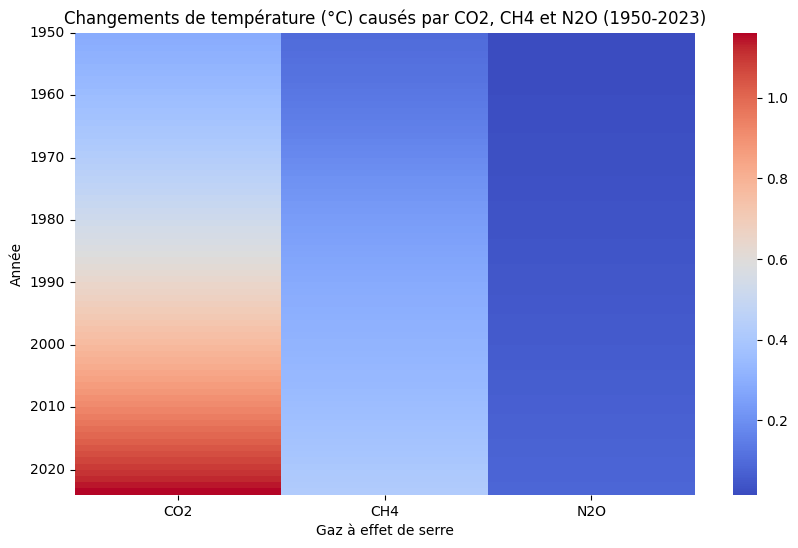

In [ ]:
owid_ghg_1950 = owid_ghg.loc[owid_ghg['year']>=1950].reset_index()

temp_changes = owid_ghg_1950.loc[:,['temperature_change_from_co2', 'temperature_change_from_ch4', 'temperature_change_from_n2o']]
plt.figure(figsize=(10, 6))

sns.color_palette("coolwarm", as_cmap=True)

#calcul des labels year tous les 10 ans
yticks = ((owid_ghg_1950['year'] / 10).astype(int) * 10).unique()

#calcul des positions tous les 10 index
yPosition = ((owid_ghg_1950.index / 10).astype(int) * 10).unique()

ax = sns.heatmap(temp_changes, cmap="coolwarm", yticklabels=yticks, xticklabels=['CO2', 'CH4', 'N2O'])

#set les ticks aux bonnes positions
ax.set_yticks(yPosition)

#modification des labels des ticks pour mettre les années tous les 10 ans
ax.set_yticklabels(yticks)
plt.ylabel("Année")
plt.xlabel("Gaz à effet de serre")

plt.title("Changements de température (°C) causés par CO2, CH4 et N2O (1950-2023)")
plt.show();

In [ ]:
#calcul des changements de temperature moyens par decennies
temp_changes_by_dec = owid_ghg.loc[:, ['year', 'temperature_change_from_co2', 'temperature_change_from_ch4', 'temperature_change_from_n2o']]

temp_changes_by_dec['decennie'] = temp_changes_by_dec['year'] // 10 * 10
temp_changes_by_dec = temp_changes_by_dec.groupby('decennie').mean()[['temperature_change_from_co2', 'temperature_change_from_ch4', 'temperature_change_from_n2o']]
sum_temp = (temp_changes_by_dec['temperature_change_from_co2'] + temp_changes_by_dec['temperature_change_from_ch4'] + temp_changes_by_dec['temperature_change_from_n2o']).values
temp_changes_by_dec['co2_percent'] = round(100 * temp_changes_by_dec['temperature_change_from_co2'] / sum_temp,2)
temp_changes_by_dec['ch4_percent'] = round(100 * temp_changes_by_dec['temperature_change_from_ch4'] / sum_temp,2)
temp_changes_by_dec['n2o_percent'] = round(100 * temp_changes_by_dec['temperature_change_from_n2o'] / sum_temp,2)
temp_changes_by_dec

,temperature_change_from_co2,temperature_change_from_ch4,temperature_change_from_n2o,co2_percent,ch4_percent,n2o_percent
decennie,,,,,,
1850,0.0063,0.0020,0.00020,74.12,23.53,2.35
1860,0.0205,0.0066,0.00100,72.95,23.49,3.56
1870,0.0358,0.0118,0.00190,72.32,23.84,3.84
1880,0.0550,0.0181,0.00290,72.37,23.82,3.82
1890,0.0782,0.0260,0.00420,72.14,23.99,3.87
1900,0.1072,0.0355,0.00550,72.33,23.95,3.71
1910,0.1419,0.0470,0.00720,72.36,23.97,3.67
1920,0.1784,0.0584,0.00890,72.61,23.77,3.62
1930,0.2184,0.0709,0.01100,72.73,23.61,3.66


# Proportion de l'impact des 3 GES dans les changements de température

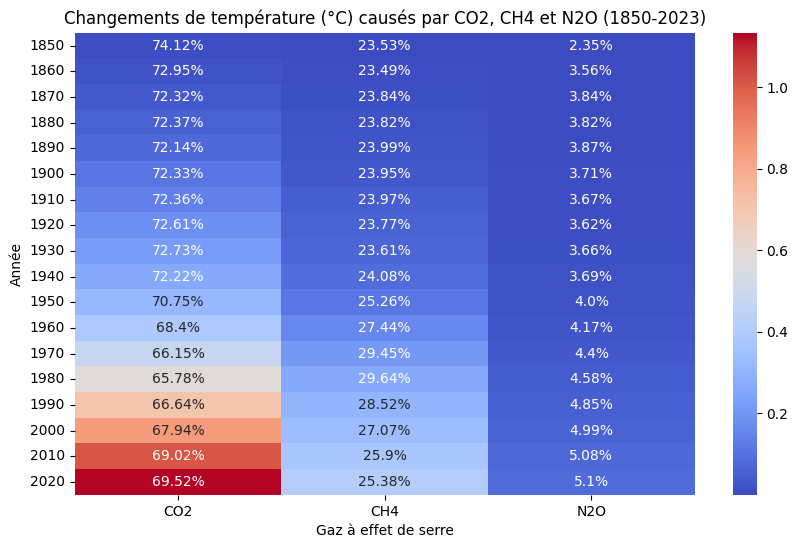

In [ ]:
plt.figure(figsize=(10, 6))

sns.color_palette("coolwarm", as_cmap=True)

#calcul des annotations en pourcentage
annotations = temp_changes_by_dec.loc[:, ['co2_percent','ch4_percent', 'n2o_percent']].apply(lambda x : round(x,2).astype(str) + "%")

ax = sns.heatmap(temp_changes_by_dec.loc[:,['temperature_change_from_co2', 'temperature_change_from_ch4', 'temperature_change_from_n2o']],
                 cmap="coolwarm", xticklabels=['CO2', 'CH4', 'N2O'],
                 annot=annotations, fmt='')

plt.ylabel("Année")
plt.xlabel("Gaz à effet de serre")

plt.title("Changements de température (°C) causés par CO2, CH4 et N2O (1850-2023)")

plt.show();

<Figure size 1500x500 with 0 Axes>

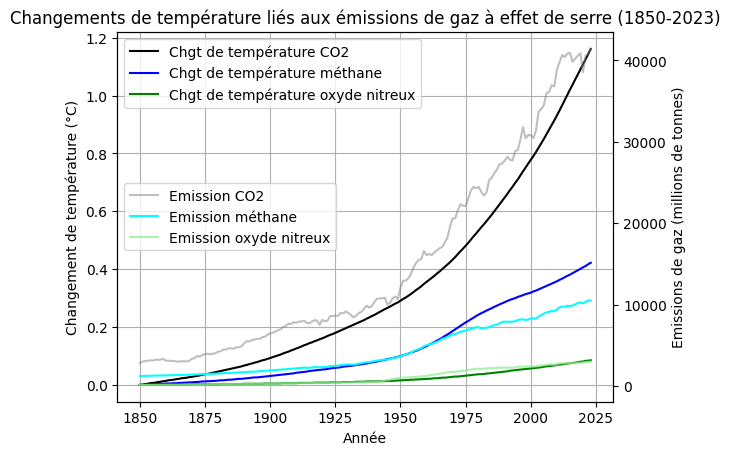

In [ ]:

plt.figure(figsize=(15,5))

fig, ax1 = plt.subplots()
plt.title("Changements de température liés aux émissions de gaz à effet de serre (1850-2023)")

palette = sns.color_palette() # Default color palette


# Premier graphique (population) en bleu
sns.lineplot(x='year', y='temperature_change_from_co2', data=owid_ghg,color='black', label='Chgt de température CO2', ax=ax1)
sns.lineplot(x='year', y='temperature_change_from_ch4', data=owid_ghg, color='blue', label='Chgt de température méthane', ax=ax1)
sns.lineplot(x='year', y='temperature_change_from_n2o', data=owid_ghg,color='green', label='Chgt de température oxyde nitreux', ax=ax1)
plt.xlabel('Année')
plt.ylabel('Changement de température (°C)')
plt.grid(True)
ax1.legend()

# Second axe Y pour les émissions de CO2
ax2 = ax1.twinx()
ax2.set_ylabel("Emissions de gaz (millions de tonnes)")
sns.lineplot(x='year', y='co2_including_luc', data=owid_ghg,color='grey', alpha=0.5, label='Emission CO2', ax=ax2)
sns.lineplot(x='year', y='methane', data=owid_ghg, color='cyan', label='Emission méthane', ax=ax2)
sns.lineplot(x='year', y='nitrous_oxide', data=owid_ghg,color='lightgreen', alpha=0.75, label='Emission oxyde nitreux', ax=ax2)
ax2.tick_params(axis='y')

ax2.legend(loc='center left')
plt.show();